<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Elif_Ayar_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [151]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 04:16:00--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.133.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.133.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.2MB/s    in 6.2s    

2020-05-13 04:16:06 (31.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [152]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [153]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01


In [154]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [47]:
order_products__prior.head()
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [48]:
#let's combine both datasets together with concat. 
#It was done below, and named as order_products.
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [49]:
orders.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15


In [0]:
# using order_id and order_number, I will combine these two datasets.
order_number=orders[['order_number','order_id']]
product_id=order_products[['order_id','product_id']]

number_of_products=pd.merge(order_number,product_id,
                            on='order_id',how="left")

                          

In [51]:
# Let's check how it looks like

number_of_products.head()

,order_number,order_id,product_id
0,1,2539329,196.0
1,1,2539329,14084.0
2,1,2539329,12427.0
3,1,2539329,26088.0
4,1,2539329,26405.0


In [52]:
#Product 
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
#Create new dataset
product_name=products[['product_id','product_name']]

In [0]:
#let's combine and creat new data set
popular_products=pd.merge(number_of_products,product_name,on='product_id',how='left' )

In [55]:
#let's check the new dataset
popular_products.head()

,order_number,order_id,product_id,product_name
0,1,2539329,196.0,Soda
1,1,2539329,14084.0,Organic Unsweetened Vanilla Almond Milk
2,1,2539329,12427.0,Original Beef Jerky
3,1,2539329,26088.0,Aged White Cheddar Popcorn
4,1,2539329,26405.0,XL Pick-A-Size Paper Towel Rolls


In [56]:
# I did not like the columns order, I want to change and arrage again
final_popular_products=popular_products[['order_id','order_number',
                                         'product_name']] 
final_popular_products.head(15)

,order_id,order_number,product_name
0,2539329,1,Soda
1,2539329,1,Organic Unsweetened Vanilla Almond Milk
2,2539329,1,Original Beef Jerky
3,2539329,1,Aged White Cheddar Popcorn
4,2539329,1,XL Pick-A-Size Paper Towel Rolls
5,2398795,2,Soda
6,2398795,2,Pistachios
7,2398795,2,Original Beef Jerky
8,2398795,2,Bag of Organic Bananas
9,2398795,2,Aged White Cheddar Popcorn


Looks better

In [62]:
#let's find the number of each products and then sort them from bigger to smaller
number_of_orders=final_popular_products['product_name'].value_counts().head(10)
number_of_orders

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

**Part A) Replicate the lesson code**

In [14]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 **1) Simple Examples**

1.1 Concatenate: either on top to each other or next to each other

In [11]:
# Create and df1 and df2 

df1=pd.DataFrame([['a',1],['b',2]], columns=('letter','number'))
df1

,letter,number
0,a,1
1,b,2


In [12]:
df2=pd.DataFrame([['c',3],['d',4]], columns=('letter','number'))
df2

,letter,number
0,c,3
1,d,4


In [13]:
# Let's combine two datasets on top eachother by using pd.concat()
df3=pd.concat([df1,df2], axis=0)
df3.reset_index(drop=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [14]:
#let's combine two datasets next to each other
df4=pd.concat([df1,df2], axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


1.2 Merge: Common key


In [15]:
# Stock Names: Dictionary
names_d= {'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 
          'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple','Google']}
stockname=pd.DataFrame(names_d)
stockname


,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [16]:
price_d={'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'],
         'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]}
openprice=pd.DataFrame(price_d)
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [17]:
# Merge the datas
named_stocks=pd.merge(stockname,openprice)
named_stocks

,Symbol,Name,OpenPrice
0,AMZN,Amazon,1703.34
1,MSFT,Microsoft,96.54
2,FB,Facebook,51.45
3,AAPL,Apple,217.51
4,GOOGL,Google,501.30


In [18]:
# Let's make third dataset
weekly_d = {'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]}
wkhigh=pd.DataFrame(weekly_d)
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [19]:
# merge with name_stocks
full_stocks=pd.merge(named_stocks,wkhigh)
full_stocks

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47


In [20]:
# Merge with name_stocks with on= 'Symbol' how='inner'. 
# Also show 'outer','left'or'right'

full_stocks=pd.merge(named_stocks,wkhigh, on='Symbol', how='inner')
full_stocks


,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47


In [21]:
full_stocks=pd.merge(named_stocks,wkhigh, on='Symbol', how='outer')
full_stocks

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN
5,NFLX,NaN,NaN,303.22


In [22]:
full_stocks=pd.merge(named_stocks, wkhigh, on="Symbol", how='left')
full_stocks

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN


1.3 Reshape: Melt and Pivot Table

      'Wide' format vs 'Tidy' format
      

In [23]:
# Let's start with a simple data
myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1=pd.DataFrame([[np.nan, 2],
                     [16,11],
                     [3,1]],
                    index=myindex,
                    columns=mycolumns)
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


This is wide format

In [24]:
# Same dataset, but different layout
table2=table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [25]:
# If we want to change table1 as "tidy" format, there are a few steps.
# First, column names as list
cols = table1.columns.to_list()
names=table1.index.tolist()
cols

['treatmenta', 'treatmentb']

In [26]:
# Convert the index in to the column with reset_index
table1=table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [27]:
# Convert the table 1 from wide format to tidy format by using melt method
tidy1=table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy1
# tidy1 = table1.melt(id_vars='index', value_vars=cols)

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [28]:
# Rename the column names
tidy1=tidy1.rename(columns={'index':'name','variable':'trt','value':'result'})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [29]:
# Make shorter the trt values such as a and b
tidy1['trt']=tidy1['trt'].str.replace('treatment',' ')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


Tidy1----> Table 1

Pivot table is the inverse of melt method





In [30]:
wide1=tidy1.pivot_table( index='name', columns='trt', values='result')
wide1

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


Seaborn Example


In [31]:
# Plot tidy1 using seaborn
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


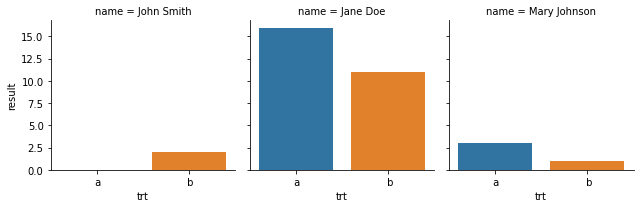

In [32]:
sns.catplot(x='trt',
            y='result',
            col='name',
            kind='bar',
            data=tidy1,
            height=3);

**2) More Complex Examples**

In [0]:
# Load the dataset: Chicago Bike Sharing
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'

q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'


In [16]:
#let's look at the some quarter data

q1=pd.read_csv(q1_path)
print(q1.shape)
q1.head()


(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [17]:
# Let's check the second quarter
q2=pd.read_csv(q2_path)
q2.shape

(1000, 12)

In [0]:
# Are the columns the same?

def diff_check(list1,list2):
  diff=list(set(list1)-set(list2))
  diff
  diff_check(q1.columns,q2.columns)

2.1 Concatenating date time serious 

In [56]:
# Let's combine two datasets together
q1_q2=pd.concat([q1,q2], axis=0)
q1_q2.shape



(2000, 12)

In [59]:
# Let'sload the rest of the other quaters and combine them all together.
q3=pd.read_csv(q3_path)
q4=pd.read_csv(q4_path)

allyear=pd.concat([q1_q2,q3,q4],axis=0)
allyear.shape

(4000, 12)

2.2 Merging datasets about the countries

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [63]:
# Read that in Panda

census=pd.read_csv(source1)
census.sample(3)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1630,30065,Montana,Musselshell County,4766,2368,2398,2.4,92.9,0.8,0.7,1.5,0.0,3723,38156,6209,23908,2076,17.4,22.8,27.4,15.7,25.9,18.6,12.4,65.7,9.8,0.0,5.4,3.0,16.1,30.5,1853,69.8,12.9,14.1,3.2,5.6
1447,28093,Mississippi,Marshall County,35981,17793,18188,3.5,47.7,47.6,0.1,0.1,0.0,27763,41134,2932,19775,1047,17.8,26.6,23.2,14.3,24.9,12.6,25.1,86.1,5.4,0.4,1.4,0.8,6.0,28.2,14304,80.3,11.9,7.7,0.1,6.2
2149,40037,Oklahoma,Creek County,70899,35142,35757,3.9,76.8,2.2,11.7,0.6,0.0,53042,47147,1518,24056,623,15.2,22.6,29.6,17.2,22.2,12.2,18.8,84.6,8.6,0.3,0.9,0.8,4.9,24.9,30227,81.6,13.1,5.1,0.2,4.2


In [64]:
# let's look at the columns
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [65]:
# let's do just a few columns set for simple analysis
commute = census[['CountyId', 'State', 'County', 'MeanCommute']]
commute.head()

,CountyId,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0
2,1005,Alabama,Barbour County,23.4
3,1007,Alabama,Bibb County,30.0
4,1009,Alabama,Blount County,35.0


In [66]:
# average commute in USA
commute['MeanCommute'].mean() 

23.47453416149071

The mean does not reflect the mean of all the same type of cities in reality. This can include some rural county or urban county..

Let's work ok different dataset right now to augment that with another dataset


In [0]:
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [69]:
# Let's look at quickly dataset

usda=pd.read_excel(source2)
usda.shape
usda.head(3)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."


In [78]:
# What is RUCC_2013 all about?

usda['RUCC_2013'].value_counts().sort_index()

1    472
2    395
3    369
4    217
5     92
6    597
7    434
8    220
9    425
Name: RUCC_2013, dtype: int64

In [79]:
# Groupby ()

usda.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [82]:
# Set the columns which we need
usda1=usda[['FIPS','RUCC_2013']]
usda1.sample(3)

,FIPS,RUCC_2013
1216,24510,1
455,13139,3
579,16057,4


In [87]:
# Merge the usda1 and commute
metro_commute=pd.merge(commute,usda1,left_on='CountyId',right_on='FIPS', 
                       how='left')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
1387,27147,Minnesota,Steele County,18.2,27147.0,5.0
2084,39083,Ohio,Knox County,24.9,39083.0,4.0
823,19069,Iowa,Franklin County,16.8,19069.0,7.0


In [90]:
# find the mean by groupby
drive_times=metro_commute.groupby("RUCC_2013")[["MeanCommute"]].mean()
drive_times


,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


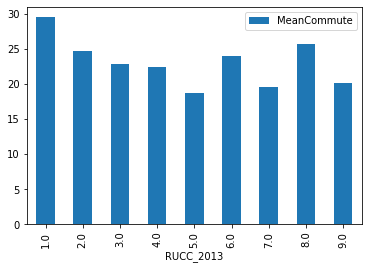

In [91]:
# Let's look at the mean at the bar graph
drive_times.plot(kind='bar');

**3) Real World Examples**

3.1 pd.concat and pd.merge


In [18]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 05:14:56--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  35.1MB/s    in 6.1s    

2020-05-13 05:15:03 (31.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [19]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [20]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state
#(i.e., new current working directory).
%cd instacart_2017_05_01/

/content/instacart_2017_05_01


In [21]:
# bash command: list the contents of that folder.
! ls *.csv

aisles.csv	 order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


**Reproduce this example**

We are going to rebuilt the same sample dataset. There are information provided all above datasets. The job is supposed to be done here, we will gain the data we need, organize, put them together to creat the same sample dataset. Let's get start it.
 

In [22]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

In [23]:
# List the contents of the cwd.
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


To know where the information we need is to check and look at the each data one by one.


In [24]:
# Read the data 'aisles'

pd.read_csv('aisles.csv')

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


the columns 'aisle_id' and 'aisle' are not really the columns we are looking for.

In [25]:
# Let's read the data departments
pd.read_csv('departments.csv')

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


No columns we need it

In [27]:
# Order_products
pd.read_csv('order_products__prior.csv').head(3)
pd.read_csv('order_products__train.csv').head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


We need :

1.   Order_id
2.   product_id
1.   Add_to_cart Order



In [28]:
# orders
orders=pd.read_csv('orders.csv')
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


We can use the columns:



1.   order_id

1.   user_id

1.   order_number
2.   order_dow

2.   order_hour_of_day


In [29]:
# products
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


We can use:


1.   product_id
2.   product_name



In [30]:
#let's look at sample data again
display(example)

In [31]:
# let's filter the columns we need from orders dataset
orders.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [32]:
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders = orders[cols]
orders.head(5)

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15


Looks good. What we are the missing columns:



1.   Cart order
2.   Product order

1.   Product name

In [33]:
# Before concate the missing columns, let's filter particular rows.
# Leave the user_id columns which equals to 1

conditions=(orders['user_id']==1)
conditions.head()

0    True
1    True
2    True
3    True
4    True
Name: user_id, dtype: bool

In [34]:
# Apply the conditions to other dataframes

print(orders[conditions].shape)
orders[conditions]

(11, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


We also need order_number is 1 and 2

In [0]:
# Create second conditions
conditions2=(orders['user_id']==1) & (orders['order_number']<=2)

In [36]:
orders_subset=orders[conditions2]
orders_subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


 Now, concatenate order_products_train and order_products_prior

In [0]:
#read the datasets
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

In [38]:
#concatenate them together
order_products = pd.concat([order_products__prior, order_products__train],
                           axis=0)
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Get the particular values from the column "order_id"
condition3 = (order_products['order_id']==2539329) | (order_products['order_id']
                                                      ==2398795)

In [40]:
# look at the order_products now
order_products_new=order_products[condition3]
order_products_new.head()

,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1


In [41]:
# Let's eliminate the columns which we do not need

my_columns=['order_id', 'add_to_cart_order', 'product_id']
order_products_subset=order_products.loc[condition3,my_columns]
order_products_subset

,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088
22742749,2398795,6,13032
24076664,2539329,1,196
24076665,2539329,2,14084
24076666,2539329,3,12427
24076667,2539329,4,26088


In [42]:
display(example)

Last step, we are going to merge the columns

In [43]:
print(orders_subset.columns)
print(order_products_subset.columns)

Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')
Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')


In [44]:
# Merge

toastcruch=pd.merge(orders_subset,order_products_subset,on="order_id", 
                    how='inner')
toastcruch


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


only missing column is product_names

In [45]:
# Final merge 
finaltoastcrunch = pd.merge(toastcruch, products[['product_id', 'product_name']], 
                            how='inner',
                            on='product_id')
finaltoastcrunch 

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


Done!


**3.2 Instacart Dataset:**

 melt and pivot_tables
Goal: Reproduce part of this example

In [81]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

In [0]:
# Read back in the datasets in their original form (no filters).
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [0]:
#Products and orders have any common columns, so we should
# use the order_products to provide a key columns for merge method
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [93]:
# let's search only these two product names in product column
conditiond = products['product_name'].isin(product_names)
products=products[conditiond]
products

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [94]:
# to make merge between two dataset, we need a common columns name, but we do 
#not have. So let's try this way.
froyo_cream = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
print(froyo_cream.shape)
froyo_cream.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
0,9292,Half And Half Ultra Pasteurized,64,16
1,9292,Half And Half Ultra Pasteurized,1883,11
2,9292,Half And Half Ultra Pasteurized,5625,9
3,9292,Half And Half Ultra Pasteurized,7765,14
4,9292,Half And Half Ultra Pasteurized,7906,9


In [95]:
# let's do one more subsets

froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]
print(froyo.shape)
print(cream.shape)
froyo.head(15)


(2983, 4)
(2995, 4)


,product_id,product_name,order_id,order_hour_of_day
2836,30668,Half Baked Frozen Yogurt,3321431,13
2907,30668,Half Baked Frozen Yogurt,3404398,14
2997,30668,Half Baked Frozen Yogurt,917,12
2998,30668,Half Baked Frozen Yogurt,1653,13
2999,30668,Half Baked Frozen Yogurt,4565,2
3000,30668,Half Baked Frozen Yogurt,5024,11
3001,30668,Half Baked Frozen Yogurt,6787,15
3002,30668,Half Baked Frozen Yogurt,7133,8
3003,30668,Half Baked Frozen Yogurt,7679,17
3004,30668,Half Baked Frozen Yogurt,8139,7


4 ways to reshape and plot

In [96]:
# 1. Let's value count
cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

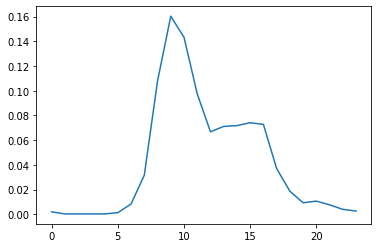

In [103]:
#Let's show as a percents 
cream_pct = cream['order_hour_of_day'].value_counts(normalize=True).sort_index();
cream_pct.plot()

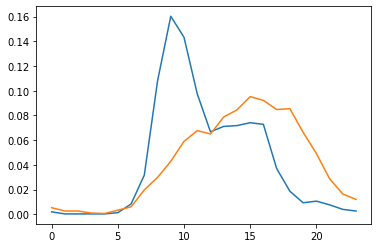

In [106]:
#let's display froyo as well
(cream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())
(froyo['order_hour_of_day'].value_counts(normalize=True).sort_index().plot());

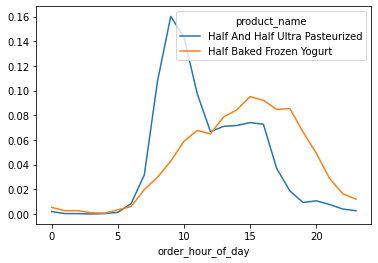

In [107]:
#Crosstab:`pd.crosstab` method
# need a few steps
pd.crosstab(froyo_cream['order_hour_of_day'],
            froyo_cream['product_name'],
            normalize='columns').plot();

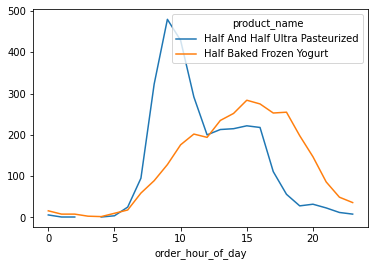

In [108]:
#Pivot Table
froyo_cream.pivot_table(index= 'order_hour_of_day',
                        columns= 'product_name',
                        values= 'order_id',
                        aggfunc= len).plot();

In [109]:
#melt
wide_table = pd.crosstab(froyo_cream['order_hour_of_day'],
                         froyo_cream['product_name'],
                         normalize=True)
wide_table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [0]:
# Convert to tidy
mycolumns={'order_hour_of_day': 'Hour of Day Ordered', 'product_name': 'Product', 
     'value': 'Percent of Orders by Product'}

In [0]:
tidy_table = wide_table.reset_index().melt(id_vars='order_hour_of_day').rename(columns=mycolumns)

In [112]:
tidy_table

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


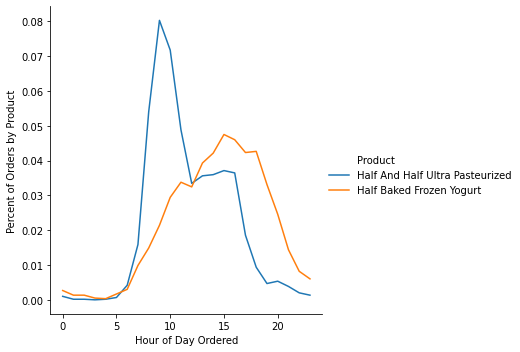

In [113]:
sns.relplot(x = 'Hour of Day Ordered',
            y = 'Percent of Orders by Product', 
            hue = 'Product',
            data = tidy_table,
            kind = 'line');

**Part) 2**
- Table 2 --> Tidy
- Tidy --> Table 2
 

In [64]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [66]:
# table2 -> tidy
tidy2=table2.reset_index()
tidy2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [68]:
tidy3=tidy2.melt(id_vars='index',value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy3

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [69]:
tidy3=tidy3.rename(columns={'index':'trt','variable':'name','value':'result'})
tidy3

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [70]:
# Let's make shorter the column's values
tidy3['trt']=tidy3['trt'].str.replace('treatment','')
tidy3

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [71]:
# tidy -> table2
wide2=tidy3.pivot_table(index='name',columns='trt',values='result')
wide2


trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Part3)**

Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [73]:
# Flights Pivot Table
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


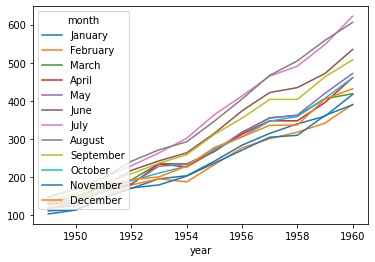

In [117]:
flights.pivot_table(index='year', 
            columns='month',
            values='passengers',
            aggfunc='sum').plot();



## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####